In [52]:
import numpy as np
import time
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

In [13]:
def mmT(N):
    T=np.zeros((N,)*6,dtype=int)
    for i in range(N):
        for j in range(N):
            for k in range(N):
                T[i][j][j][k][k][i]=1
    return T

In [56]:
def oprod(T):
    out=T[0]
    for i in range(1,len(T)):
        out=np.multiply.outer(out,T[i])
    return out
def compress(T):
    S=T.shape
    assert len(S)%2==0, 'odd-dimensional tensor'
    nS=[]
    for i in range(0,len(S),2):
        nS.append(S[i]*S[i+1])
    return T.reshape(tuple(nS))
def sumdecomp(decomp):
    return sum(map(oprod,decomp))

In [50]:
def readmat(info,vals={'0':0,'1':1,'n':-1}):
    return np.array(list(map(
        lambda rowstr:list(map(lambda v:vals[v],list(rowstr))),
        info.split('.'))))
list(map(readmat,['10.01']))
def decomp3cyc(A,B,C,D):
    out=[[a,a,a] for a in A]
    for b,c,d in zip(B,C,D):
        out.extend([[b,c,d],[c,d,b],[d,b,c]])
    return np.array(out)
STRASSEN=decomp3cyc(
    *map(lambda l:list(map(readmat,l)),[
            ['10.01'],
            *list(map(lambda ss:ss+[s[::-1] for s in ss],
                #reversing this string repr of matrix == rotating matrix 180 degrees
                [['00.11'],
                ['10.00'],
                ['01.0n']]
            ))
    ])
)
print(np.array_equal(mmT(2),sumdecomp(STRASSEN)))
#DOESN'T WORK (requires an "Alternative Basis" trick): https://www.cs.huji.ac.il/~odedsc/papers/SPAA17-MatMul-a-Little-Faster.pdf
KARSTADT_SCHWARTZ=np.array([
    *[[np.array([1 if j==i else 0 for j in range(4)]).reshape((2,2))]*3 for i in range(4)],
    *map(lambda l:list(map(lambda s:np.transpose(readmat(s)),l)),[
            ['01.n0','0n.01','11.00'],
            ['n1.00','01.n0','0n.0n'],
            ['0n.01','n1.00','01.10'],
    ])
])
#print(KARSTADT_SCHWARTZ)
print(np.array_equal(mmT(2),sumdecomp(KARSTADT_SCHWARTZ)))
BALLARD=decomp3cyc(
    *map(lambda l:list(map(lambda s:np.transpose(readmat(s)),l)),[
        ['000.010.000','100.000.000','000.00n.001','000.000.011','000.001.0nn'],
        ['001.000.0n0','000.000.010','000.000.100','00n.000.000','000.100.n00','0n0.000.0n0'],
        ['n11.000.n00','n11.001.n00','00n.1nn.010','1nn.000.000','000.0n0.010','n00.000.n00'],
        ['000.n11.0nn','000.011.0nn','0nn.000.000','000.1nn.n11','0n0.000.000','000.100.000']
    ])
)
print(np.array_equal(mmT(3),sumdecomp(BALLARD)))

True
False
True


In [149]:
def plotT(ax,T,colmap=(lambda x:plt.get_cmap('bwr')(128*x+128)),**kwargs):
    data=np.array(np.where(T!=0))
    ax.scatter(*data,c=list(map(lambda pt:colmap(T[tuple(pt)]),np.transpose(data))),**kwargs)

<IPython.core.display.Javascript object>


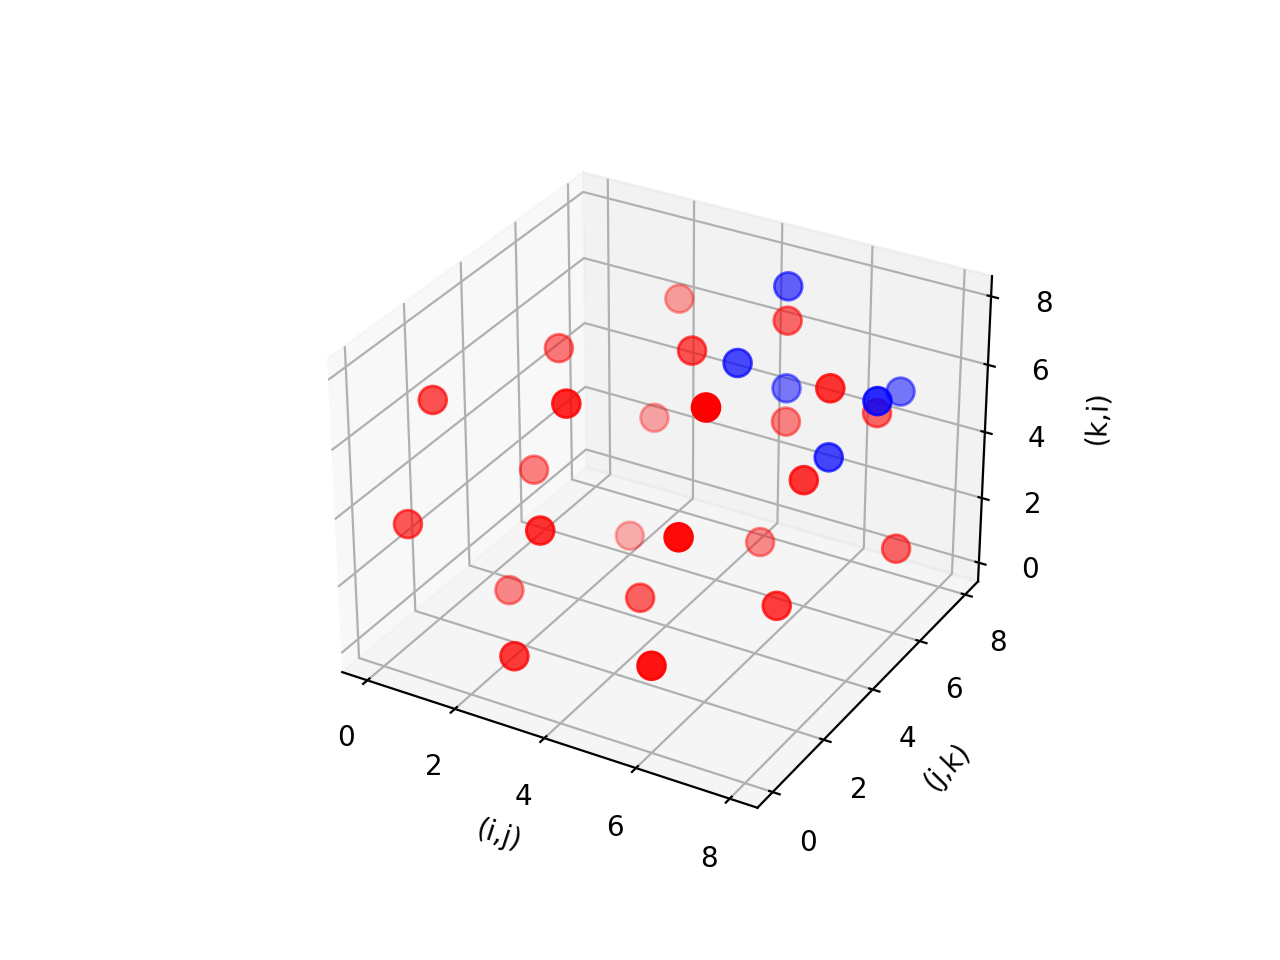

In [150]:
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax.set_xlabel('(i,j)')
ax.set_ylabel('(j,k)')
ax.set_zlabel('(k,i)')
plotT(ax,compress(mmT(3)-sumdecomp(BALLARD[:5])),s=100)

In [151]:
target=compress(mmT(2)-sumdecomp(KARSTADT_SCHWARTZ[:4]))
NUMS=12
timest=time.time()
for i in range(3**NUMS):
    t=list(map(lambda v:-1 if v==2 else v,
               [(i//(3**b))%3 for b in range(NUMS)]))
    B,C,D=t[:4],t[4:8],t[8:]
    if np.array_equal(oprod([B,C,D])+oprod([C,D,B])+oprod([D,B,C]),target):
        print(B,C,D)
        break
print('time='+str(time.time()-timest))
#there is no cyclicly symmetric 7-rank decomposition of mmT(2)
#    if 4 of the rank-1 tensors are of the form oprod((a,)*3) for a binary matrix a containing exactly one 1 element

time=15.521341323852539
